# Verifica di Microrobotica: machine learning

In [85]:
from sklearn.neural_network import MLPClassifier #classificatore
from sklearn.model_selection import train_test_split #split in train e test set
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


### Nome Cognome

## Esercizio 1: concessionario di auto
Un venditore di automobili vuole classificare i suoi pontenziali clienti in due categorie: quelli che  vogliono acquistare un SUV e quelli che non lo acquisterebbero mai. Ti commissiona un algoritmo di machine learning che sia adatto allo scopo e ti fornisce il dataset storico degli acquirenti nel file `SUV_Purchase.csv` che contiene: 
* `User ID`: l'identificativo dei clienti
* `Gender`: il sesso dei clienti
* `Age`: l'età anagrafica dei clienti
* `EstimatedSalary`: il salario annuo dei clienti
* `Purchased` che vale 1 se il cliente acquista un SUV, 0 altrimenti.

Realizza un algoritmo di machine learning di tipo MultiLayer Perceptron adatto allo scopo. **Segui tutte le fasi previste per la creazione di un algoritmo di machine learning e qualora certe fasi non siano utili, spegane il motivo. Motiva anche la scelta delle feature.**

PS: non è dato sapere se il concessionario di auto voglia vendere più SUV oppure se non sopporti i SUV...

In [86]:
data=pd.read_csv("./SUV_Purchase.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [88]:
label_encoder=LabelEncoder()
    
#creazione di una nuova colonna quantitative di un dataframe a partire da una colonna qualitativa
data["gender_value"]=label_encoder.fit_transform(data["Gender"])
data

,User ID,Gender,Age,EstimatedSalary,Purchased,gender_value
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


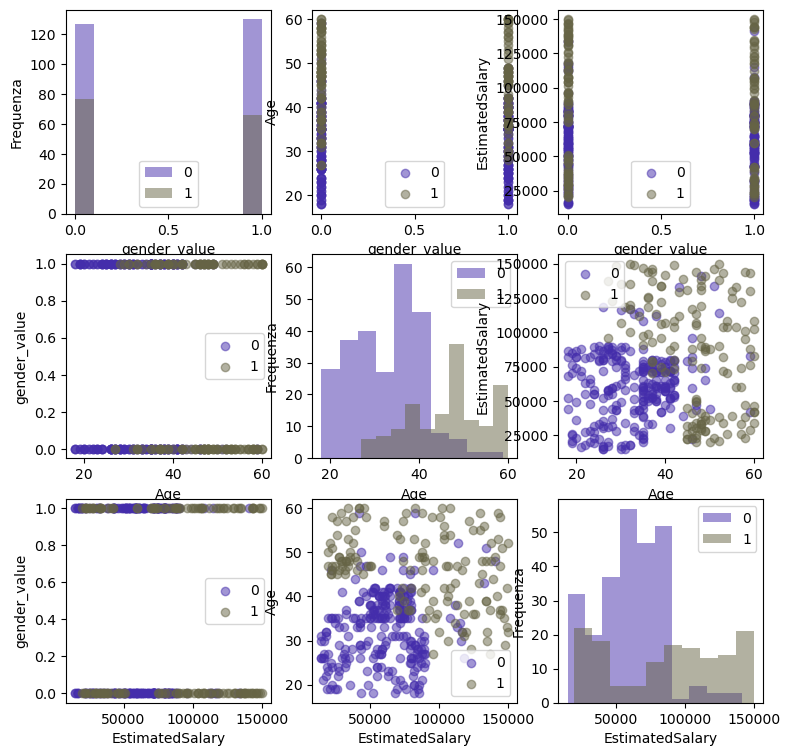

In [89]:
selected_cols=["gender_value", "Age", "EstimatedSalary" ]
#colonne di interesse

analisi_grafica(data, "Purchased", selected_cols)

In [90]:
X=data[["Age", "EstimatedSalary", "gender_value"]]
y=data["Purchased"]
scaler=StandardScaler()
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [8]:
model=MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1, max_iter=300)

In [18]:
model.fit(X_train_scaled, y_train)

C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

In [19]:
print(f"Accuratezza set TRAIN: {model.score(X_train_scaled, y_train)}")
print(f"Accuratezza set TEST: {model.score(X_test_scaled, y_test)}")

Accuratezza set TRAIN: 0.9321428571428572
Accuratezza set TEST: 0.9166666666666666


## Esercizio 2: riconoscitore di banconote false

Il dataset `banknotes.csv` contiene le misure geometriche di precisione di 200 banconote (` Lengt`,`Right`,`Bottom`,`Top`,`Diagonal`). Inoltre la colonna `conterfeit` vale 1 se la banconota è contraffatta. Si vuole implementare un algoritmo in grado di eseguire su di una macchinetta portatile con bassa potenza di calcolo ma che abbia il 100% di accuratezza. Realizza un classificatore random forest adatto allo scopo e:
* calcola la profondità minima degli alberi che permetta un'accuratezza del 100%
* calcola l'importanza delle diverse feature
* riaddrestra il modello facendo uso delle feature che rilevi come quelle più importanti.

**Segui tutte le fasi previste per la creazione di un algoritmo di machine learning e qualora certe fasi non siano utili, spegane il motivo.**

In [91]:
banknotes=pd.read_csv("./banknotes.csv")
banknotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [92]:
banknotes

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,1,215.0,130.4,130.3,9.9,12.1,139.6
196,1,215.1,130.3,129.9,10.3,11.5,139.7
197,1,214.8,130.3,130.4,10.6,11.1,140.0
198,1,214.7,130.7,130.8,11.2,11.2,139.4


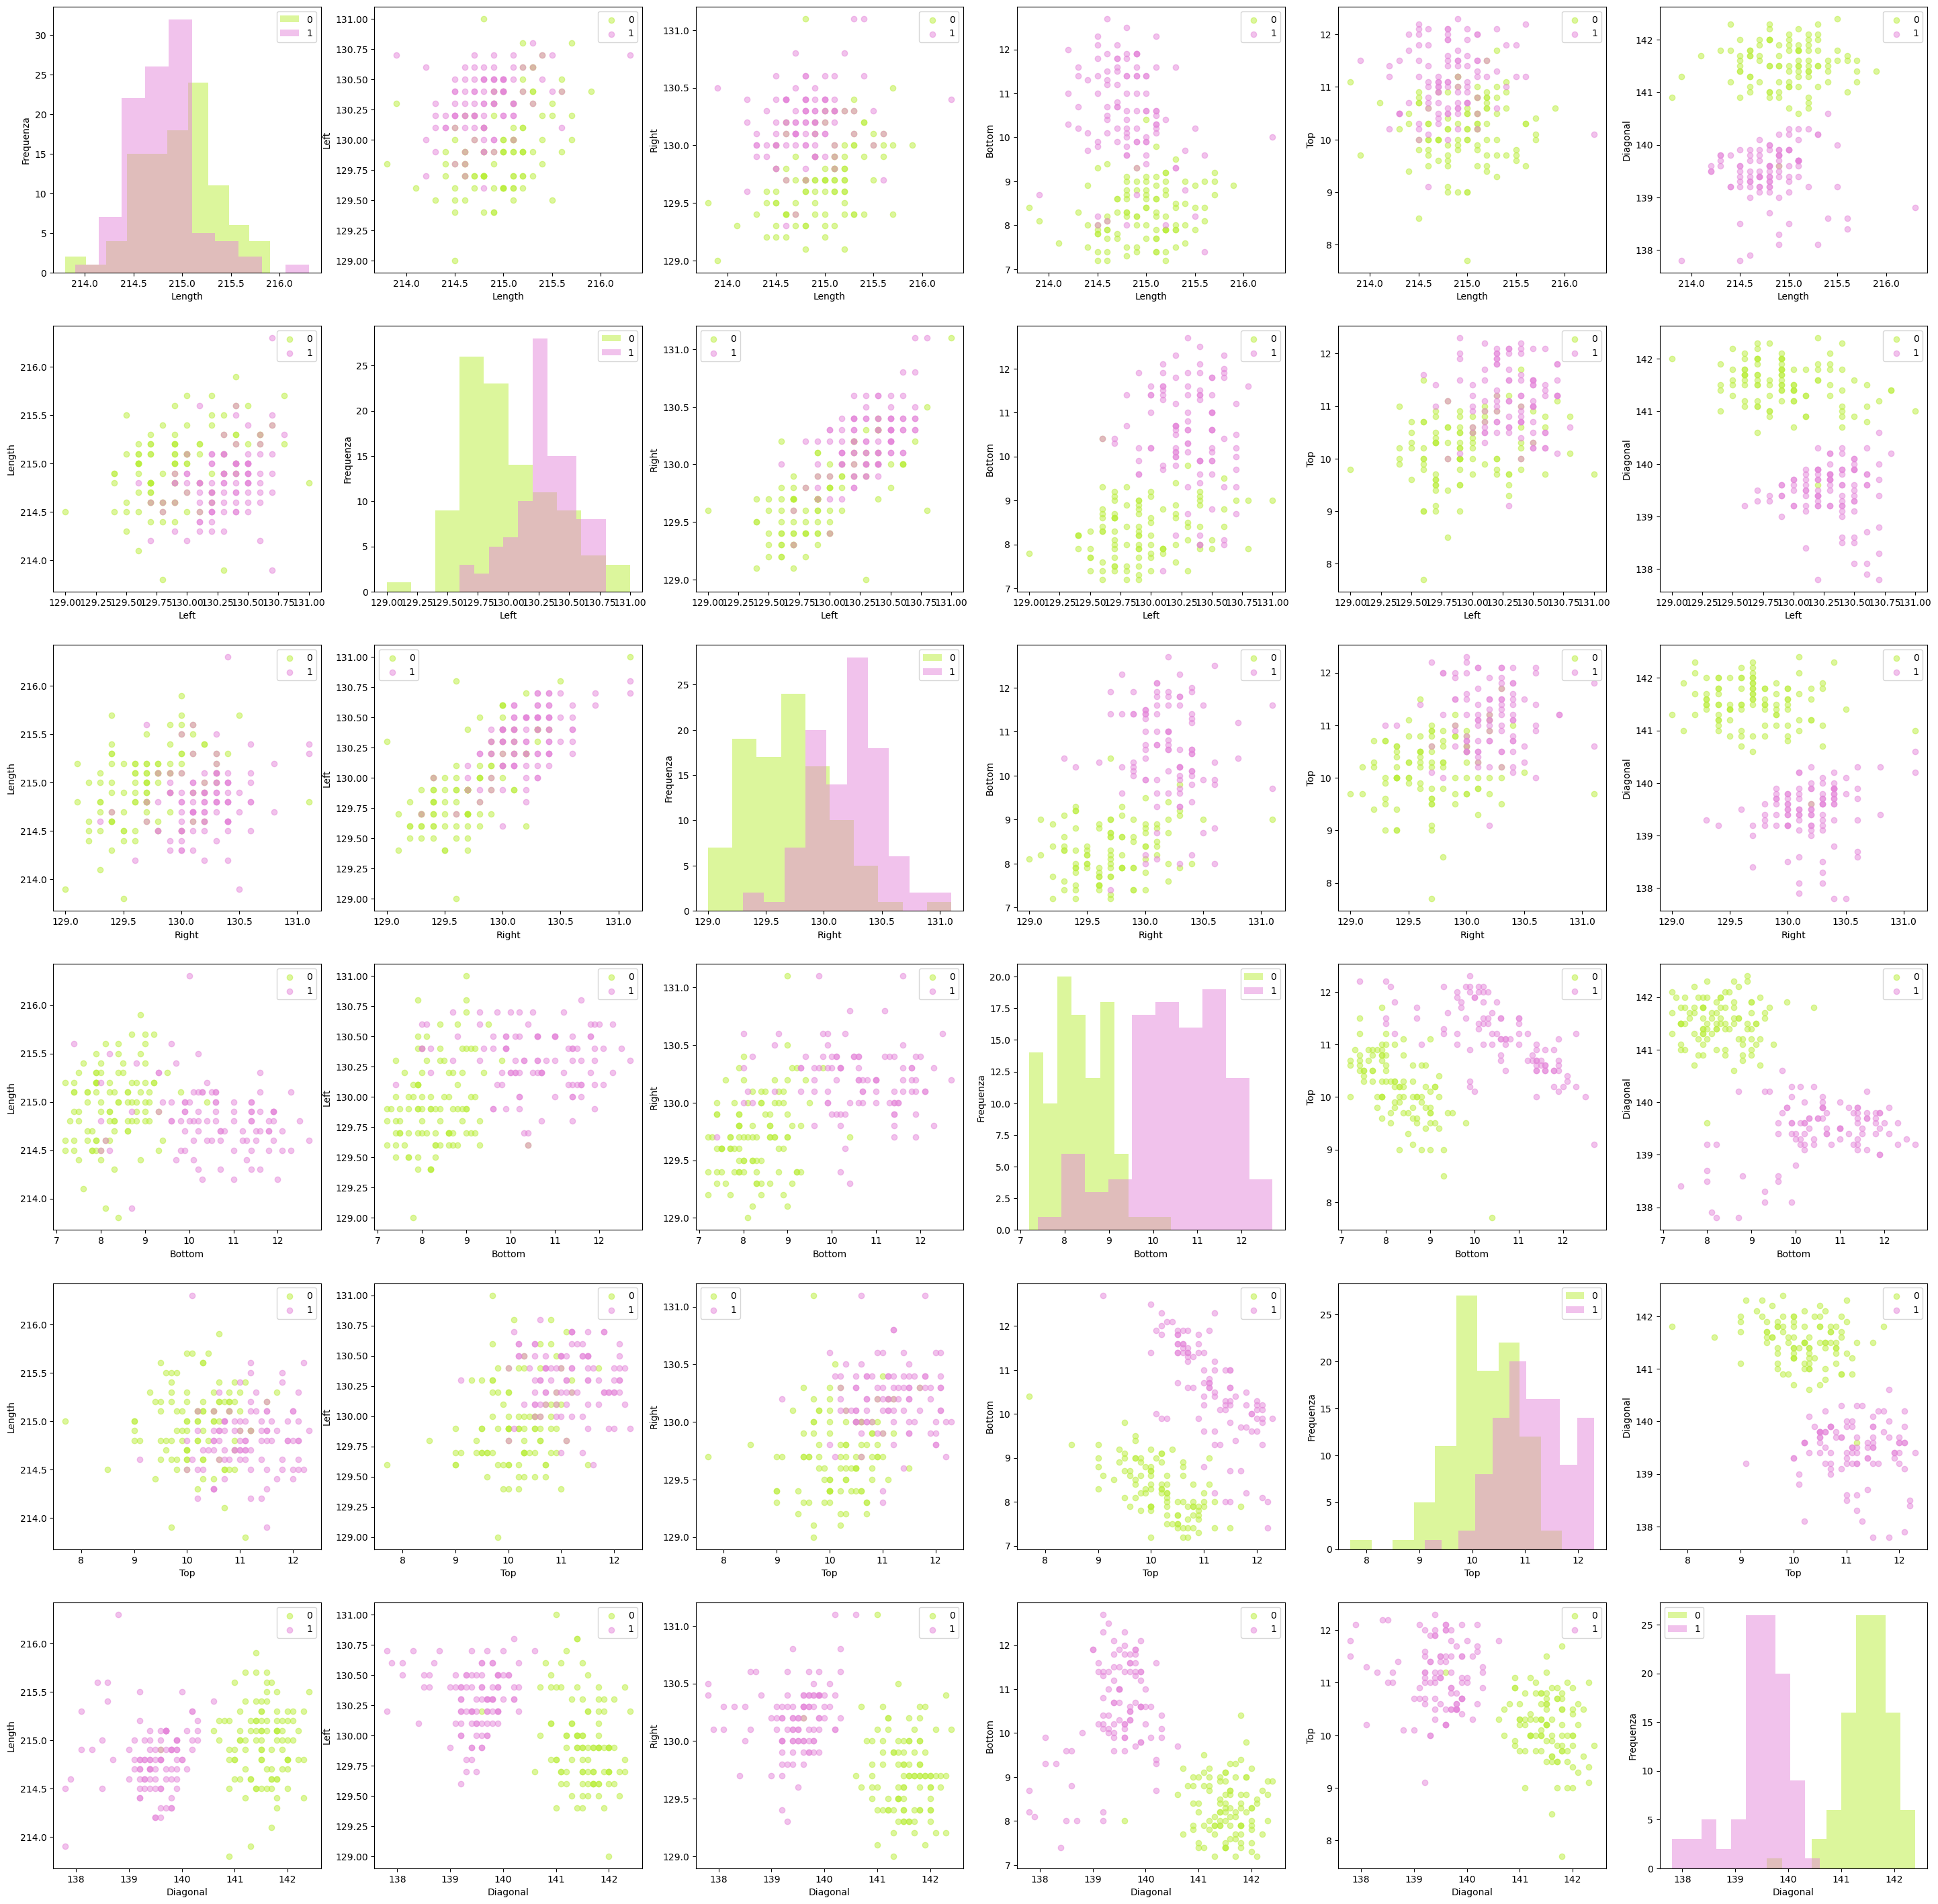

In [93]:
analisi_grafica(banknotes, "conterfeit", ["Length", "Left", "Right", "Bottom", "Top", "Diagonal"])

In [94]:
X=banknotes[["Diagonal", "Length"]].values
y=banknotes["conterfeit"].values
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=0)

In [95]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled=scaler_test.fit_transform(X_test)

In [96]:
model=MLPClassifier(hidden_layer_sizes=(50,50), random_state=1, max_iter=100)

In [97]:
model.fit(X_train_scaled, y_train)

C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100, random_state=1)

In [98]:
print(f"Accuratezza set TRAIN: {model.score(X_train_scaled, y_train)}")
print(f"Accuratezza set TEST: {model.score(X_test_scaled, y_test)}") 

Accuratezza set TRAIN: 0.9857142857142858
Accuratezza set TEST: 1.0
